In [1]:
#For reference OpenEI data for  ERC Form 1 Electric Utility Cost, Energy Sales, Peak Demand, and Customer Count Data 1994-2016 can all be found on the website: 
# https://openei.org/datasets/dataset/ferc-form-1-electric-utility-cost-energy-sales-peak-demand-and-customer-count-data-1994-2016

In [2]:
import urllib  # the module for reading a url
import csv  # the module for opening a .csv format file
import pandas  # the module for opening a .xlsx file


# read a .xlsx format file with a given URL
onlinefile_excel = urllib.request.urlopen("https://openei.org/datasets/dataset/a72953fe-0715-4c4a-8965-1572cdf242d5/resource/6f4a177c-cd0d-44f9-b676-79fdccc5262c/download/fercform1electricutilitydata19942016.xlsx")


In [3]:
import pandas as pd
data= pd.ExcelFile(onlinefile_excel)


In [4]:
data.sheet_names

['FERC Form 1 Utility Data', 'Notes']

In [5]:
df = data.parse("FERC Form 1 Utility Data")

In [6]:
df.head()

,FERC Utility ID Number,Utility Name,Reporting Year,Distribution Capital Additions (Nominal USD),Distribution Operation Cost (Nominal USD),Distribution Maintenance Cost (Nominal USD),Transmission Capital Additions (Nominal USD),Transmission Operation Cost (Nominal USD),Transmission Maintenance Cost (Nominal USD),General Plant Capital Additions (Nominal USD),...,Interdepartmental Sales (MWh),Peak Demand (MW),Total Customers,Residential Customers,Commercial Customers,Industrial Customers,Public Street and Highway Lighting Customers,Other Public Customers,Railroad and Railway Customers,Interdepartmental Customers
0,1,AEP Generating Company,1994,NaN,NaN,NaN,NaN,NaN,NaN,208574.0,...,NaN,1318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ALABAMA POWER COMPANY,1994,194861273.0,27781393.0,96379689.0,42988564.0,13325781.0,30397138.0,58646828.0,...,3650.0,9028.0,1200226.0,1034284.0,159914.0,5347.0,680.0,NaN,NaN,1.0
2,3,Alaska Electric Light and Power Company,1994,1093143.0,756678.0,591491.0,730366.0,57540.0,80967.0,613887.0,...,NaN,62.0,13071.0,11248.0,1164.0,81.0,182.0,396.0,NaN,NaN
3,4,Alcoa Generating Corporation,1994,NaN,NaN,NaN,0.0,9368.0,52022.0,NaN,...,NaN,562.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,5,THE ALLEGHENY GENERATING COMPANY,1994,NaN,NaN,NaN,35375.0,47949.0,317357.0,-79677.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def total_d(row):    
    return (row['Distribution Capital Additions (Nominal USD)'] + row['Distribution Operation Cost (Nominal USD)'] + row['Distribution Maintenance Cost (Nominal USD)'])*100
def total_t(row):    
    return (row['Transmission Capital Additions (Nominal USD)'] + row['Transmission Operation Cost (Nominal USD)'] + row['Transmission Maintenance Cost (Nominal USD)'])*100

      
df['total_distr'] = df.apply(total_d, axis=1)
df['total_trans'] = df.apply(total_t, axis=1)

In [8]:
df.head()

,FERC Utility ID Number,Utility Name,Reporting Year,Distribution Capital Additions (Nominal USD),Distribution Operation Cost (Nominal USD),Distribution Maintenance Cost (Nominal USD),Transmission Capital Additions (Nominal USD),Transmission Operation Cost (Nominal USD),Transmission Maintenance Cost (Nominal USD),General Plant Capital Additions (Nominal USD),...,Total Customers,Residential Customers,Commercial Customers,Industrial Customers,Public Street and Highway Lighting Customers,Other Public Customers,Railroad and Railway Customers,Interdepartmental Customers,total_distr,total_trans
0,1,AEP Generating Company,1994,NaN,NaN,NaN,NaN,NaN,NaN,208574.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ALABAMA POWER COMPANY,1994,194861273.0,27781393.0,96379689.0,42988564.0,13325781.0,30397138.0,58646828.0,...,1200226.0,1034284.0,159914.0,5347.0,680.0,NaN,NaN,1.0,3.190224e+10,8.671148e+09
2,3,Alaska Electric Light and Power Company,1994,1093143.0,756678.0,591491.0,730366.0,57540.0,80967.0,613887.0,...,13071.0,11248.0,1164.0,81.0,182.0,396.0,NaN,NaN,2.441312e+08,8.688730e+07
3,4,Alcoa Generating Corporation,1994,NaN,NaN,NaN,0.0,9368.0,52022.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.139000e+06
4,5,THE ALLEGHENY GENERATING COMPANY,1994,NaN,NaN,NaN,35375.0,47949.0,317357.0,-79677.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.006810e+07


In [9]:
df['tot_d_cust']= df['total_distr']/df['Total Energy Sales (MWh)']/1000
df['tot_t_cust']= df['total_trans']/df['Total Energy Sales (MWh)']/1000

In [10]:
df.head()

,FERC Utility ID Number,Utility Name,Reporting Year,Distribution Capital Additions (Nominal USD),Distribution Operation Cost (Nominal USD),Distribution Maintenance Cost (Nominal USD),Transmission Capital Additions (Nominal USD),Transmission Operation Cost (Nominal USD),Transmission Maintenance Cost (Nominal USD),General Plant Capital Additions (Nominal USD),...,Commercial Customers,Industrial Customers,Public Street and Highway Lighting Customers,Other Public Customers,Railroad and Railway Customers,Interdepartmental Customers,total_distr,total_trans,tot_d_cust,tot_t_cust
0,1,AEP Generating Company,1994,NaN,NaN,NaN,NaN,NaN,NaN,208574.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ALABAMA POWER COMPANY,1994,194861273.0,27781393.0,96379689.0,42988564.0,13325781.0,30397138.0,58646828.0,...,159914.0,5347.0,680.0,NaN,NaN,1.0,3.190224e+10,8.671148e+09,0.750744,0.204055
2,3,Alaska Electric Light and Power Company,1994,1093143.0,756678.0,591491.0,730366.0,57540.0,80967.0,613887.0,...,1164.0,81.0,182.0,396.0,NaN,NaN,2.441312e+08,8.688730e+07,0.853206,0.303659
3,4,Alcoa Generating Corporation,1994,NaN,NaN,NaN,0.0,9368.0,52022.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.139000e+06,NaN,0.001354
4,5,THE ALLEGHENY GENERATING COMPANY,1994,NaN,NaN,NaN,35375.0,47949.0,317357.0,-79677.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.006810e+07,NaN,NaN


In [11]:
t1=df[(df['Utility Name'] == 'Florida Power & Light Company')] 
t2=df[(df['Utility Name'] == 'Georgia Power Company')] 
t3=df[(df['Utility Name'] == 'VIRGINIA ELECTRIC AND POWER COMPANY')] 
t4=df[(df['Utility Name'] == 'Southern California Edison Company')] 
t5=df[(df['Utility Name'] == 'PACIFIC GAS AND ELECTRIC COMPANY')] 
top5=df[(df['Utility Name'] == 'Florida Power & Light Company') |(df['Utility Name'] == 'Georgia Power Company')|(df['Utility Name'] == 'VIRGINIA ELECTRIC AND POWER COMPANY')|(df['Utility Name'] == 'Southern California Edison Company')|(df['Utility Name'] == 'PACIFIC GAS AND ELECTRIC COMPANY')]

In [19]:
top5.head()

,FERC Utility ID Number,Utility Name,Reporting Year,Distribution Capital Additions (Nominal USD),Distribution Operation Cost (Nominal USD),Distribution Maintenance Cost (Nominal USD),Transmission Capital Additions (Nominal USD),Transmission Operation Cost (Nominal USD),Transmission Maintenance Cost (Nominal USD),General Plant Capital Additions (Nominal USD),...,Commercial Customers,Industrial Customers,Public Street and Highway Lighting Customers,Other Public Customers,Railroad and Railway Customers,Interdepartmental Customers,total_distr,total_trans,tot_d_cust,tot_t_cust
131,133,PACIFIC GAS AND ELECTRIC COMPANY,1994,421502469.0,140677637.0,120423067.0,60232680.0,38671904.0,21055957.0,5589071.0,...,542565.0,1211.0,16709.0,49.0,4.0,0.0,6.826032e+10,1.199605e+10,0.954555,0.167753
333,133,PACIFIC GAS AND ELECTRIC COMPANY,1995,420587950.0,106210606.0,175719659.0,65533128.0,48256936.0,25994020.0,6417418.0,...,543259.0,1208.0,17089.0,45.0,5.0,0.0,7.025182e+10,1.397841e+10,0.971377,0.193280
540,133,PACIFIC GAS AND ELECTRIC COMPANY,1996,484804908.0,116805807.0,246985027.0,70189368.0,49255147.0,30280538.0,9745365.0,...,546250.0,1209.0,17583.0,39.0,1.0,0.0,8.485957e+10,1.497251e+10,1.157402,0.204210
749,133,PACIFIC GAS AND ELECTRIC COMPANY,1997,744978775.0,125531554.0,259274724.0,82055845.0,53329839.0,29410145.0,9353567.0,...,551820.0,1081.0,17955.0,39.0,1.0,0.0,1.129785e+11,1.647958e+10,1.481868,0.216152
951,133,PACIFIC GAS AND ELECTRIC COMPANY,1998,719313555.0,137880047.0,272868462.0,219299528.0,58462974.0,31433644.0,7341275.0,...,554565.0,1067.0,18351.0,26.0,0.0,0.0,1.130062e+11,3.091961e+10,1.493205,0.408556


Text(0.5,1,'Transmission Costs (¢/kWh)')

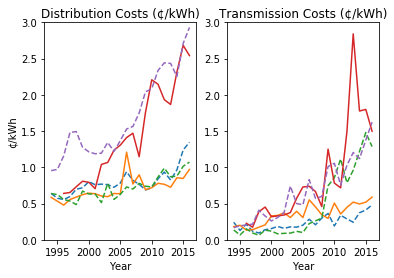

In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
x= np.linspace(1994,2016,1)
y=t1['tot_d_cust']

plt.plot(t1['Reporting Year'],t1['tot_d_cust'],'--',label='Florida Power & Light Co.')
plt.plot(t2['Reporting Year'],t2['tot_d_cust'], label = 'Georgia Power Co.')
plt.plot(t3['Reporting Year'],t3['tot_d_cust'],'--', label = 'Virginia Electric & Power Co.')
plt.plot(t4['Reporting Year'],t4['tot_d_cust'], label = 'Southern California Edison Co.')
plt.plot(t5['Reporting Year'],t5['tot_d_cust'], '--',label= 'PG&E')

plt.xlabel('Year')
plt.ylabel('¢/kWh')
plt.ylim(0,3)
plt.title('Distribution Costs (¢/kWh)')

plt.subplot(1, 2, 2)
x= np.linspace(1994,2016,1)
y=t1['tot_d_cust']

plt.plot(t1['Reporting Year'],t1['tot_t_cust'],'--',label='Florida Power & Light Co.')
plt.plot(t2['Reporting Year'],t2['tot_t_cust'], label = 'Georgia Power Co.')
plt.plot(t3['Reporting Year'],t3['tot_t_cust'],'--', label = 'Virginia Electric & Power Co.')
plt.plot(t4['Reporting Year'],t4['tot_t_cust'], label = 'Southern California Edison Co.')
plt.plot(t5['Reporting Year'],t5['tot_t_cust'], '--',label= 'PG&E')

plt.xlabel('Year')

plt.ylim(0,3)
plt.title('Transmission Costs (¢/kWh)')

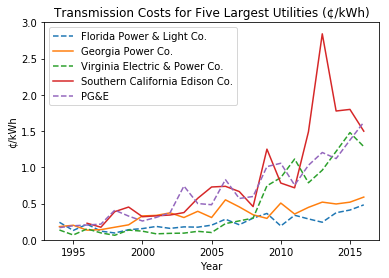

In [54]:
import numpy as np
import matplotlib.pyplot as plt
x= np.linspace(1994,2016,1)
y=t1['tot_d_cust']
plt.figure()
plt.plot(t1['Reporting Year'],t1['tot_t_cust'],'--',label='Florida Power & Light Co.')
plt.plot(t2['Reporting Year'],t2['tot_t_cust'], label = 'Georgia Power Co.')
plt.plot(t3['Reporting Year'],t3['tot_t_cust'],'--', label = 'Virginia Electric & Power Co.')
plt.plot(t4['Reporting Year'],t4['tot_t_cust'], label = 'Southern California Edison Co.')
plt.plot(t5['Reporting Year'],t5['tot_t_cust'], '--',label= 'PG&E')
plt.legend()
plt.xlabel('Year')
plt.ylabel('¢/kWh')
plt.ylim(0,3)
plt.title('Transmission Costs for Five Largest Utilities (¢/kWh)')


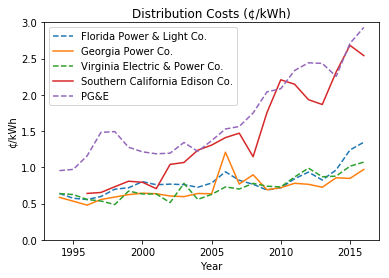

In [55]:
import numpy as np
import matplotlib.pyplot as plt

x= np.linspace(1994,2016,1)
y=t1['tot_d_cust']
plt.figure()
plt.plot(t1['Reporting Year'],t1['tot_d_cust'],'--',label='Florida Power & Light Co.')
plt.plot(t2['Reporting Year'],t2['tot_d_cust'], label = 'Georgia Power Co.')
plt.plot(t3['Reporting Year'],t3['tot_d_cust'],'--', label = 'Virginia Electric & Power Co.')
plt.plot(t4['Reporting Year'],t4['tot_d_cust'], label = 'Southern California Edison Co.')
plt.plot(t5['Reporting Year'],t5['tot_d_cust'], '--',label= 'PG&E')
plt.legend()
plt.xlabel('Year')
plt.ylabel('¢/kWh')
plt.ylim(0,3)
plt.title('Distribution Costs (¢/kWh)')
